In [ ]:
!pip install optuna

In [ ]:
# scikit-learnに入っているアヤメデータを分類する
from sklearn import datasets

# データの読込
iris = datasets.load_iris()

# 学習データとテストデータへの振分
from sklearn.model_selection import train_test_split

# x_train: 教師データの特徴量
# x_validation: 検証データの特徴量
# y_train: 教師データのラベル
# y_validation: 検証データのラベル
# train_size=0.8: 80%を学習データ、20%をテストデータに振り分ける
# random_state=0: いつも同じ振分結果になるように固定値をセットする
x_train, x_test, y_validation, y_validation = train_test_split(iris.data, iris.target, train_size=0.8, random_state=0)

# 学習
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

# 予測
from sklearn.metrics import accuracy_score

pred = model.predict(x_validation)
ac_score = accuracy_score(y_validation, pred)
print(ac_score)

In [ ]:
# scikit-learnに入っているアヤメデータを分類する
from sklearn import datasets

# データの読込
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split

# X_train: 教師データの特徴量
# X_validation: 検証データの特徴量
# y_train: 教師データのラベル
# y_validation: 検証データのラベル
# train_size=0.8: 80%を教師データ、20%を検証データに振り分ける
# random_state=0: いつも同じ振分結果になるように固定値をセットする
x_train, x_validation, y_train, y_validation = train_test_split(iris.data, iris.target, train_size=0.8, random_state=0)

# 学習
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

# 予測
from sklearn.metrics import accuracy_score

pred = model.predict(x_validation)
ac_score = accuracy_score(y_validation, pred)
print(ac_score)

In [ ]:
# scikit-learnに入っているアヤメデータを分類する
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# データの読込
data = datasets.load_iris()

# X_train: 教師データの特徴量
# X_validation: 検証データの特徴量
# y_train: 教師データのラベル
# y_validation: 検証データのラベル
# train_size=0.8: 80%を教師データ、20%を検証データに振り分ける
# random_state=0: いつも同じ振分結果になるように固定値をセットする
x_train, x_validation, y_train, y_validation = train_test_split(data.data, data.target, train_size=0.8, random_state=0)

# 学習
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_validation)
ac_score = accuracy_score(y_validation, y_pred)
print(ac_score)


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_boston()
x_train, x_validation, y_train, y_validation = train_test_split(data.data, data.target, train_size=0.8, random_state=0)

# 学習
model = xgb.XGBRegressor(objective="reg:linear")
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_validation)
mse=mean_squared_error(y_validation, y_pred)
print(mse)

In [ ]:
import optuna
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial):
    # ハイパーパラメータ
    eta = trial.suggest_uniform("eta", 0.01, 0.2)
    learning_rate = trial.suggest_uniform(" learning_rate", 0.1, 1.0)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)

    # 学習
    model = xgb.XGBRegressor(
        eta=eta,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree)
    model.fit(x_train, y_train)

    # 予測
    y_pred = model.predict(x_validation)
    return mean_squared_error(y_validation, y_pred)

data = load_boston()
x_train, x_validation, y_train, y_validation = train_test_split(data.data, data.target, train_size=0.8, random_state=0)

study = optuna.create_study()
study.optimize(objective, n_trials=10)
print(study.best_params)
print(study.best_value)

In [28]:
import pandas as pd
import shap
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

data = load_boston()
x = pd.DataFrame(data.data, columns=data.feature_names)
x_train, x_validation, y_train, y_validation = train_test_split(x, data.target, train_size=0.8, random_state=0)

# 学習
model = xgb.XGBRegressor(
#     objective="reg:linear",
    eta=0.32,
    learning_rate=0.5,
    max_depth=8,
    subsample=0.7,
    colsample_bytree=0.6)
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_validation)
msa = mean_squared_error(y_validation, y_pred)
print(msa)

From version 0.21, test_size will always complement train_size unless both are specified.


[20:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
29.259463012140806


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


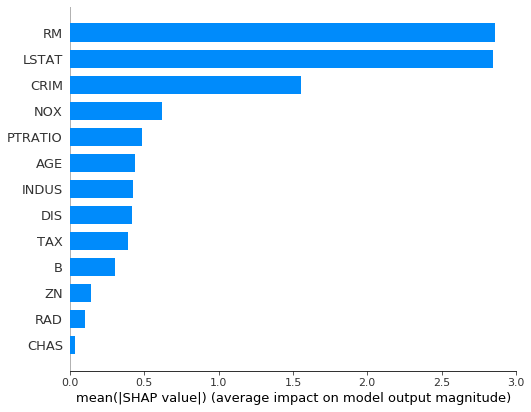

In [29]:
# 解釈
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train) # X_trainは訓練データのpandas.DataFrame
shap.summary_plot(shap_values, x_train, plot_type="bar")

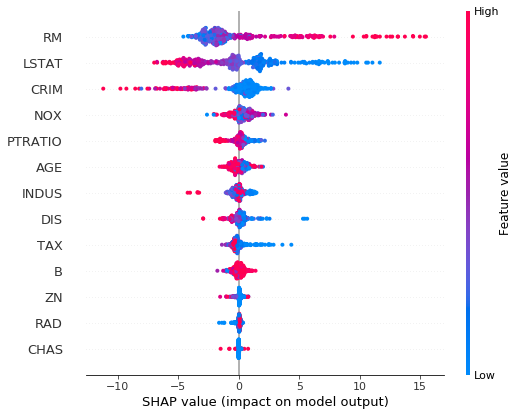

In [30]:
shap.summary_plot(shap_values, x_train)

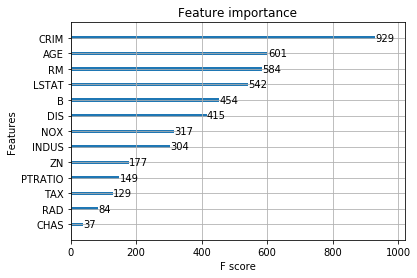

In [31]:
xgb.plot_importance(model)

[09:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
21.471843729261288


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


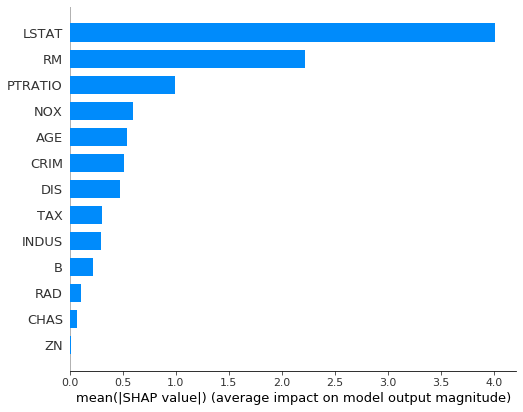

In [44]:
model = xgb.XGBRegressor(
    objective="reg:linear")
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_validation)
msa = mean_squared_error(y_validation, y_pred)
print(msa)

# 解釈
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train) # X_trainは訓練データのpandas.DataFrame
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
!pip install lightgbm

In [ ]:
import optuna
import optuna.integration.lightgbm as lgb
# import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = lgb.LGBMRegressor()

data = load_boston()
x_train, x_validation, y_train, y_validation = train_test_split(data.data, data.target, train_size=0.8, random_state=0)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_validation, y_validation, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse'
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

# best_params = dict()
# tuning_history = list()

# booster = lgb.train(
#     params,
#     lgb_train,
#     valid_sets=lgb_eval,
#     verbose_eval=0,
#     best_params=best_params,
#     tuning_history=tuning_history)
 
# print(‘Best Params:’, best_params)
# print(‘Tuning history:’, tuning_history)

# y_pred = model.predict(x_validation, num_iteration=model.best_iteration)
# mean_squared_error(y_validation, y_pred)
